![image](resources/qcqh-lab-header.png)

# Lab 1: Single-qubit and multi-qubit states, quantum teleportation
By Elena Cai

# Introduction and LOs

#QISKit: In this lab, I used the Qiskit library to plot single and multi-qubit circuits. I also used the sample_counts method to simulate the empirical measurement of the quantum state. In some steps, including the modified question in the end, I visualized the states by using Q-sphere. The lab was especially helpful in strengthening my skill in dealing with both qubit and classical bits by codes such as {QuantumCircuit(2, 2) #create a circuit with 2 qubits and 2 classical bits} and {mycircuit.measure([0,1], [0,1]) #measure [0,1] qubit to [0,1] cbit}.

#QuantumCircuits: The quantum teleportation exercise was a great demonstration of this LO. I used both single and multi-qubits gates to create the Bell state. I clearly described the evolution of the multi-qubit state by using adding comments. Quantum teleportation involves three qubits and two classic bits. Two of the qubits would need to be entangled, with one of the two experiencing a CNOT gate with the non-entangled qubit and then a Hadamard gate for the non-entangled qubit. Two classical bits are used to record the state of the first two qubits, and those determine whether or not to implement the Z and X gates for Bob's qubit. 

# Original Lab
In this lab, you will learn how to write `Qiskit` code and investigate single-qubit and multi-qubit states using the `qpshere` visualization that you learned in lectures 1 to 3.

If you have not used Jupyter notebooks before, take a look at the following video to quickly get started.
- https://www.youtube.com/watch?v=jZ952vChhuI

Remember, to run a cell in Jupyter notebooks, you press `Shift` + `Return/Enter` on your keyboard.

### Installing necessary packages

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations. At the end, the cell outputs will be cleared.

In [1]:
!pip install -U -r resources/requirements.txt

from IPython.display import clear_output
clear_output()

# Single-qubit states

In lecture, you learned that single qubit states can be written down generally as 

$$\sqrt{1-p}\vert0\rangle + e^{i\phi}\sqrt{p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $1$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.

Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

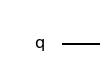

In [2]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1) #construct a one-qubit circuit
mycircuit.draw('mpl') #draw the circuit diagram

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the statevector $\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [3]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0') #create the zero statevector

You can see what's contained in the object `sv`:

In [4]:
sv #print out statevector, j represents i

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

The vector itself can be found by writing

In [5]:
sv.data #print out statevector

array([1.+0.j, 0.+0.j])

As you can see, the above matches what you learned in lecture. Recall that $$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [6]:
new_sv = sv.evolve(mycircuit) #apply the circuit to the zero state vector

Once again, you can look at the new statevector by writing

In [7]:
new_sv #print out new state vector

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

As you can see, the statevector hasn't changed. Recall the concept of state projection that you learned in lecture. You can compute the projection of `new_sv` onto `sv` by writing

In [8]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv) #project new state vector onto state vector

1.0

As you can see, the projection of `new_sv` onto `sv` is 1, indicating that the two states are identical. You can visualize this state using the `qsphere` by writing

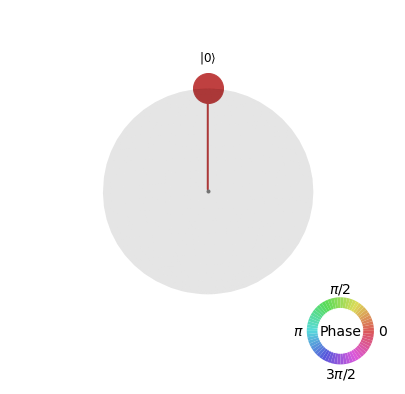

In [9]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

As you learned in lectures 1 to 3, applying an $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. To see this clearly, we will first create a single-qubit quantum circuit with the $X$ gate.

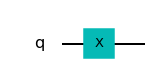

In [10]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0) #apply x-gate

mycircuit.draw('mpl') #draw out circuit with x-gate

Now, we can apply this circuit onto our state by writing

In [11]:
sv = Statevector.from_label('0') #create the zero vector
new_sv = sv.evolve(mycircuit)  #apply the x-gate circuit to the zero vector
new_sv #print out new state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

Now, the projection of `new_sv` onto `sv` is 

In [12]:
state_fidelity(new_sv, sv) #project new statevector to statevector

0.0

This is not surprising. Recall from the lecture that the states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

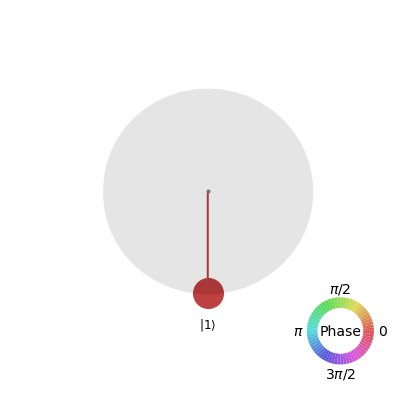

In [13]:
plot_state_qsphere(new_sv.data)

Similarly, we can create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$
by applying a Hadamard gate as you learned in lecture. Here is how we can create the state and visualize it in `Qiskit`:

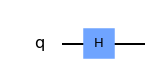

In [14]:
sv = Statevector.from_label('0') #create zero vector
mycircuit = QuantumCircuit(1) #create a circuit with one qubit
mycircuit.h(0) #apply the Hadamard gate to the first qubit
mycircuit.draw('mpl') #draw the new circuit

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


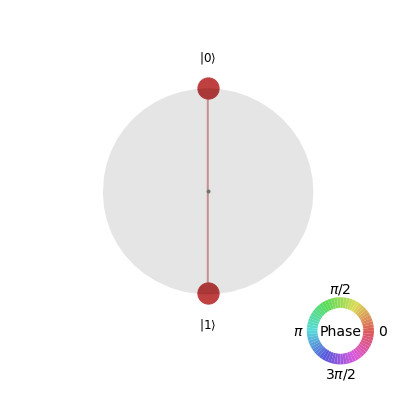

In [15]:
new_sv = sv.evolve(mycircuit) #apply the circuit on the zero vector
print(new_sv) #print out the new state vector
plot_state_qsphere(new_sv.data) #plot the q-sphere

As you can see above, the state has equal components of $\vert0\rangle$ and $\vert1\rangle$. The size of the circle is proportional to the probability of measuring each basis state in the statevector. As a result, you can see that the size of the circles is half of the size of the circles in our previous visualizations.

Recall from lecture that we can also create other superpositions with different phase. Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


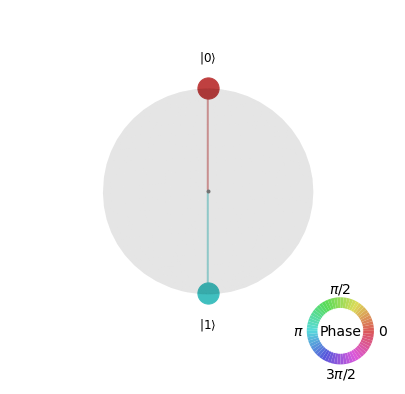

In [16]:
sv = Statevector.from_label('1') #create vector 1
mycircuit = QuantumCircuit(1) #create a circuit with 1 qubit
mycircuit.h(0) #apply the Hadamard gate to the first qubit

new_sv = sv.evolve(mycircuit) #apply the circuit to the vector
print(new_sv) #print out the new state vector
plot_state_qsphere(new_sv.data) #plot on q-sphere

This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

Other phases can also be created by applying different gates. The $T$ and $S$ gates apply phases of $+\pi/4$ and $+\pi/2$, respectively. The widget below helps you see different gates, and their actions on single-qubit quantum states.

In [17]:
from resources.qiskit_textbook.widgets import gate_demo
gate_demo(qsphere=True)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

A summary of the operations of the most common gates on single-qubit states is given by the handy image below, where the phases are shown in degrees.

![image](resources/gates-and-qspheres.png)

# Multi-qubit states

Similar to the discussion above, you can also explore multi-qubit gates in `Qiskit`. In lecture, you learned about Bell states, and how they can be generated using quantum gates. We will demonstrate below how to create the Bell state $$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ from the state $\vert00\rangle$. We'll start by visualizing the state $\vert00\rangle$ using the same procedure:

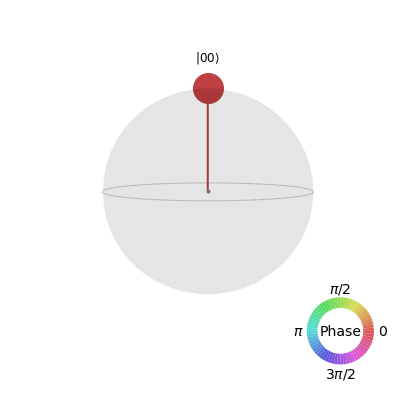

In [18]:
sv = Statevector.from_label('00') #create state vector 00
plot_state_qsphere(sv.data) #plot on qsphere

Next, we use the Hadamard gate described above, along with a controlled-X gate, to create the Bell state.

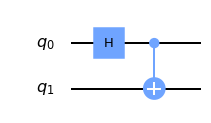

In [19]:
mycircuit = QuantumCircuit(2) #create a circuit with 2 qubits
mycircuit.h(0) #apply Hadamard gate on the first qui=bit
mycircuit.cx(0,1) #apply C-NOT gate on the circuit with the first one being control
mycircuit.draw('mpl') #draw out the circuit

The result of this quantum circuit on the state $\vert00\rangle$ is found by writing

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


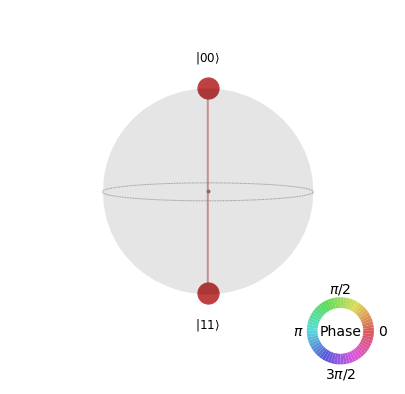

In [20]:
new_sv = sv.evolve(mycircuit) #apply the circuit on the 00 state vector
print(new_sv) #print out new state vector
plot_state_qsphere(new_sv.data)

Note how this looks very similar to a single-qubit superposition with zero phase. Following entanglement, it is no longer possible to treat the two qubits individually, and they must be considered to be one system. 

To see this clearly, we can see what would happen if we measured the Bell state above 1000 times.

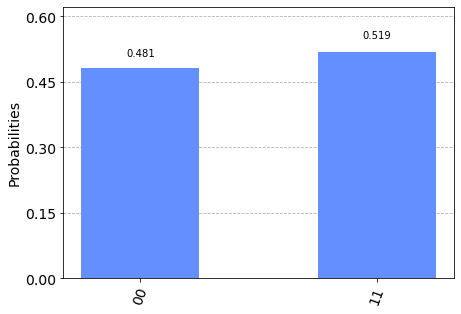

In [21]:
counts = new_sv.sample_counts(shots=1000) #measure the state for 1000 times

from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you can see above, all measurements give either the result `00` or `11`. In other words, if the measurement outcome for one of the qubits is known, then the outcome for the other is fully determined.

### Ungraded exercise 1

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle + \vert10\rangle\right)$$ using a similar procedure?

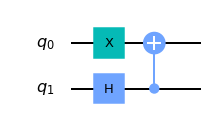

In [96]:
sv = Statevector.from_label('00') #create state vector 00
mycircuit = QuantumCircuit(2) #create a circuit with 2 qubits
mycircuit.x(0) #apply x-gate on the second qubit
mycircuit.h(1) #apply Hadamard gate on the second qubit
mycircuit.cx(1,0) #apply C-NOT gate on the circuit with the second one being control
mycircuit.draw('mpl') #draw out the circuit

In [97]:
new_sv = sv.evolve(mycircuit) #apply the circuit on the 00 state vector
print(new_sv) #print out new state vector

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


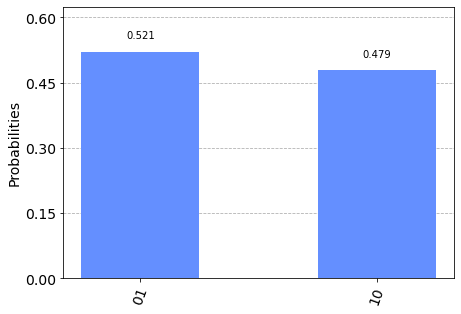

In [98]:
counts = new_sv.sample_counts(shots=1000) #measure the state for 1000 times

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Ungraded exercise 2

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$$ using a similar procedure?

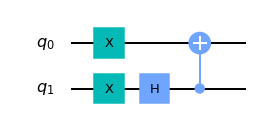

In [88]:
sv = Statevector.from_label('00') #create state vector 00
mycircuit = QuantumCircuit(2) #create a circuit with 2 qubits
mycircuit.x(0) #change 0 to 1 for first qubit
mycircuit.x(1) #change 0 to 1 for second qubit
mycircuit.h(1) #apply Hadamard gate on the second qubit
mycircuit.cx(1,0) #apply C-NOT gate on the circuit with the second one being control
mycircuit.draw('mpl') #draw out the circuit

In [89]:
new_sv = sv.evolve(mycircuit) #apply the circuit on the 00 state vector
print(new_sv) #print out new state vector

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


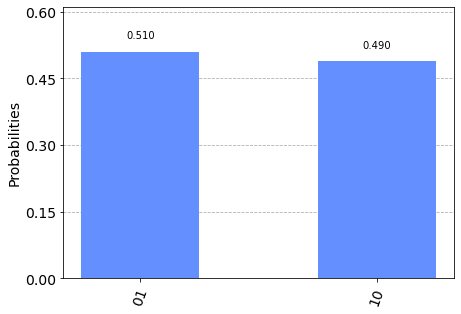

In [92]:
counts = new_sv.sample_counts(shots=1000) #measure the state for 1000 times

from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Measurements

In the above example, we simulated the action of a measurement by sampling counts from the statevector. A measurement can explicitly be inserted into a quantum circuit as well. Here is an example that creates the same Bell state and applies a measurement.

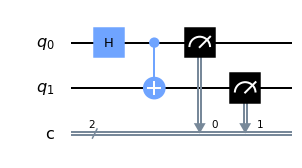

In [28]:
mycircuit = QuantumCircuit(2, 2) #create a circuit with 2 qubits and 2 classical bits
mycircuit.h(0) #apply Hadamarde gate to the first qubit
mycircuit.cx(0,1) #apply C-NOT gate with the first qubit being the control
mycircuit.measure([0,1], [0,1]) #measure [0,1] qubit to [0,1] cbit
mycircuit.draw('mpl')

Two new features appeared in the circuit compared to our previous examples. 

- First, note that we used a second argument in the `QuantumCircuit(2,2)` command. The second argument says that we will be creating a quantum circuit that contains two qubits (the first argument), and two classical bits (the second argument).
- Second, note that the `measure` command takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits onto which the outcomes from the measurements of the qubits will be stored.

Since the above quantum circuit contains non-unitaries (the measurement gates), we will use `Qiskit`'s built-in `Aer` simulators to run the circuit. To get the measurement counts, we can use the following code:

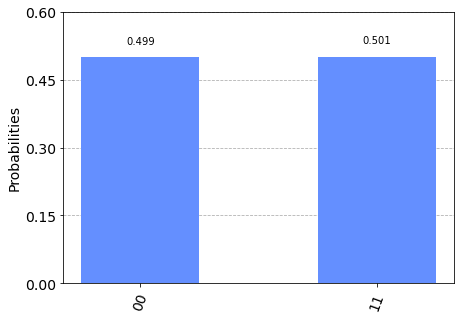

In [29]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator') #use simulators to run the circuits
result = execute(mycircuit, simulator, shots=10000).result() #try 10000 times
counts = result.get_counts(mycircuit) #count the result
plot_histogram(counts)

As you can see, the measurement outcomes are similar to when we sampled counts from the statevector itself.

# Graded exercise 1: Quantum teleportation

In this graded exercise, you will teleport the quantum state 
$$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

This exercise guides you through each of these steps.

### Initializing the state to be teleported

First, create a quantum circuit that creates the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ You can do this by using `Qiskit`'s `initialize` function.

In [30]:
def initialize_qubit(given_circuit, qubit_index): #initialize qubit with give-circuit as parameters and qubit_index as qubits
    
    import numpy as np
    given_circuit.initialize([np.sqrt(0.7), np.sqrt(0.3)], qubit_index)
    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

In [31]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    given_circuit.h(qubit_Alice) #apply the Hadamarde gate to Alice's qubit
    given_circuit.cx(qubit_Alice, qubit_Bob) #apply the C-NOT gate with Alice being the control
    
    return given_circuit

Next, we need to do a Bell measurement of Alice's qubits.

In [32]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    given_circuit.cx(qubit1_Alice, qubit2_Alice) #apply C-NOT gate with Alice qubit 1 as control
    given_circuit.h(qubit1_Alice) #apply Hadamarde gate to Alice's qubit
    given_circuit.barrier()
    given_circuit.measure(qubit1_Alice, clbit1_Alice) #measure the first qubit to the first cbit
    given_circuit.measure(qubit2_Alice, clbit2_Alice) #measure the second qubit to the second cbit

    return given_circuit

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

In [33]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1) # Apply x-gate if the second qubit is 1 
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1) # Apply z-gate if the first qubit is 1 

    return given_circuit

The next lines of code put everything together. **You do not need to modify anything below, but you will need to run the cell.**

In [34]:
### imports
from qiskit import QuantumRegister, ClassicalRegister

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Look at the complete circuit
mycircuit.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
q3_0: ┤ initialize(0.83666,0.54772) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
      └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
q3_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
q4_0: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                      ░      └───┘ ░            ░  ║  ║  ░ »
c0: 1/═════════════════════════════════════════════════════════════╩══╬════»
                                                                   0  ║    »
c1: 1/════════════════════════════════════════════════════════════════╩════»
                                                                      0    »
«                    
«q3_0: ──────────────
«                    
«q3_1: ──────────────
«       ┌───┐  ┌───┐ 
«q4_0: ─┤ X ├──┤ Z ├─
«       └─┬─┘  └─┬─┘ 
«         │   ┌──┴──┐
«c0: 1/═══╪═══╡ = 1 ╞
«      ┌──┴──┐└─────┘
«c1: 1/╡ = 1 ╞═══════
«      └─────┘

# Additional reading

- You can watch a video on building the quantum teleportation quantum circuit here: https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=6&t=0s

- For additional details about the quantum teleportation algorithm, including the principle of deferred measurement, you can refer to the Qiskit Textbook's section on the algorithm here: https://qiskit.org/textbook/ch-algorithms/teleportation.html

- The `1 minute Qiskit` episode entitled `What is the qsphere?` succinctly describes the Qsphere visualization tool that we used in this lab. You can find it here: https://youtu.be/4SoK2h4a7us

# Modified Lab Question

### Can you create a q-sphere that looks like the Qiskit logo?

Rationale: This question is modified from the ungraded question. In the ungraded question, it asks to create states that involve two qubits. My question takes it to a higher level of creating a state with three qubits and requires an understanding of q-sphere. 

The Qiskit logo has three lines, which means 3+1 = 4 qubits are involved in this system. The q-sphere hence has
$\vert0000\rangle $ on its north pole and $\vert1111\rangle $ on its south pole. Next, the question needs some research on the GHZ state (creating a path through line) and applying one more x-gate. As the number of qubits increases, the q-sphere can become very complicated (and dense), so it is helpful to create a mental model starting from a lower dimension (with two qubits in previous ungraded questions) and building to higher dimensions (with four qubits in my question).

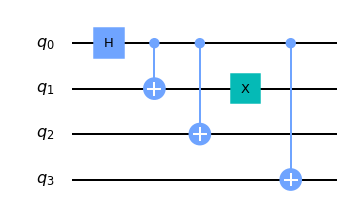

In [86]:
sv = Statevector.from_label('0000') #create state vector 0000
mycircuit = QuantumCircuit(4) #create a circuit with 4 qubits to create 3 lines in the q-sphere

#to create a line that go through the sphere, we need to create a GHZ state

mycircuit.h(0) #apply Hadamarde gate on the first qubit
for i in range(3): #apply CNOT gate on every other qubit, with control on the first qubit
    mycircuit.cx(0,i+1)

mycircuit.x(1) #apply x-gate on the first qubit to rotate the line
mycircuit.draw('mpl') #draw out the circuit

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))


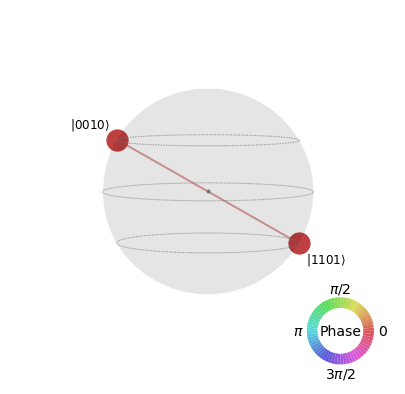

In [87]:
new_sv = sv.evolve(mycircuit) #apply the circuit on the 00 state vector
print(new_sv) #print out new state vector
plot_state_qsphere(new_sv.data)